In [20]:
import os
import sys

sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
from matplotlib.image import imread

from utils.data import load_mat
from utils.visualization import *

data_path = '../data/'
results_path = '../results/'

### Load Images

In [21]:
# Leaf Phantom.
rec_das_phantom = load_mat(os.path.join(results_path, 'das_phantom.mat'))
rec_dual_das_phantom = load_mat(os.path.join(results_path, 'das_dual_phantom.mat'))
rec_apact_phantom = load_mat(os.path.join(results_path, 'apact_phantom.mat'))
rec_jr_phantom = load_mat(os.path.join(results_path, 'jr_phantom.mat'))

SoS_jr_phantom = load_mat(os.path.join(results_path, 'SoS_phantom_jr.mat'))
SoS_APACT_phamtom = np.ones_like(SoS_jr_phantom) * 1500
SoS_dual_phantom = load_mat(os.path.join(results_path, 'SoS_phantom_dual.mat'))

img_phantom = imread('leaf_phantom.jpg')

# In vivo Mouse Liver.
rec_das_invivo = load_mat(os.path.join(results_path, 'das_invivo.mat'))
rec_dual_das_invivo = load_mat(os.path.join(results_path, 'das_dual_invivo.mat'))
rec_apact_invivo = load_mat(os.path.join(results_path, 'apact_invivo.mat')) 
rec_jr_invivo = load_mat(os.path.join(results_path, 'jr_invivo.mat'))   

SoS_jr_invivo = load_mat(os.path.join(results_path, 'SoS_invivo_jr.mat'))
SoS_APACT_invivo = np.ones_like(SoS_jr_invivo) * 1500
SoS_dual_invivo = load_mat(os.path.join(results_path, 'SoS_invivo_dual.mat'))

img_mouse = imread('mouse.jpg')
img_mouse = img_mouse[24:1024,16:1016,:]

Successfully loaded data from "../results/das_phantom.mat".
Successfully loaded data from "../results/das_dual_phantom.mat".
Successfully loaded data from "../results/apact_phantom.mat".
Successfully loaded data from "../results/jr_phantom.mat".
Successfully loaded data from "../results/SoS_phantom_jr.mat".
Successfully loaded data from "../results/SoS_phantom_dual.mat".
Successfully loaded data from "../results/das_invivo.mat".
Successfully loaded data from "../results/das_dual_invivo.mat".
Successfully loaded data from "../results/apact_invivo.mat".
Successfully loaded data from "../results/jr_invivo.mat".
Successfully loaded data from "../results/SoS_invivo_jr.mat".
Successfully loaded data from "../results/SoS_invivo_dual.mat".


In [22]:
[rec_das_phantom, rec_dual_das_phantom, rec_apact_phantom, rec_jr_phantom] = \
    [standardize(img) for img in [rec_das_phantom, rec_dual_das_phantom, rec_apact_phantom, rec_jr_phantom]]
[rec_das_invivo, rec_dual_das_invivo, rec_apact_invivo, rec_jr_invivo] = \
    [standardize(img) for img in [rec_das_invivo, rec_dual_das_invivo, rec_apact_invivo, rec_jr_invivo]]

### Create Figure

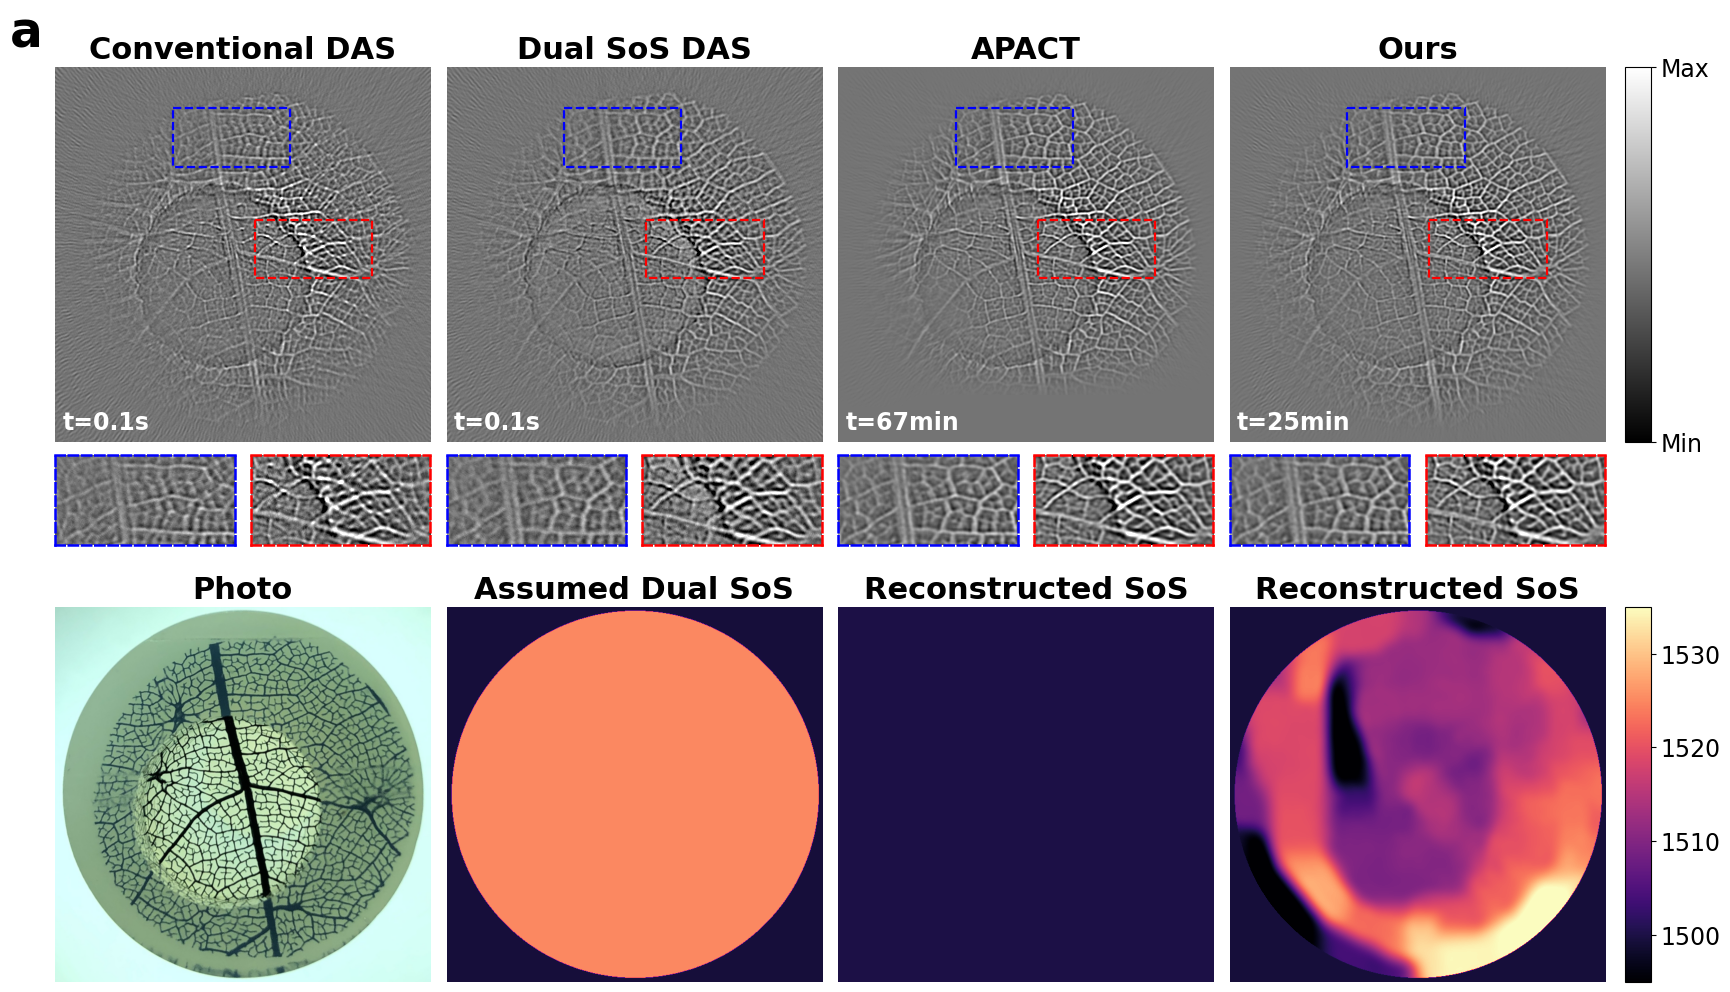

In [23]:
patches = [(70, 200, 100, 200, 'blue'), (260, 340, 100, 200, 'red')]

fig = plt.figure(figsize=(20, 12))
gs = GridSpec(19, 16)
norm = Normalize(vmax=6, vmin=-5)
norm_sos = Normalize(vmax=1535, vmin=1495)
for idx, (img, method, time, SoS, SoS_title) in enumerate(zip([rec_das_phantom, rec_dual_das_phantom, rec_apact_phantom, rec_jr_phantom],
                                                              ['Conventional DAS', 'Dual SoS DAS', 'APACT', 'Ours'],
                                                              ['t=0.1s', 't=0.1s', 't=67min', 't=25min'],
                                                              [None, SoS_dual_phantom, SoS_APACT_phamtom, SoS_jr_phantom],
                                                              ['Photo', 'Assumed Dual SoS', 'Reconstructed SoS', 'Reconstructed SoS'])):
    ax = plt.subplot(gs[0:8,idx*4:(idx+1)*4])
    plt.title(method, fontsize=22, fontweight='semibold')
    plt.axis('off')
    if idx == 0:
        plt.title('a', loc='left', x=-0.12, y=1.03, fontsize=35, fontweight='semibold', color='black')
    plt.imshow(img, cmap='gray', norm=norm)
    plt.text(s=time, x=12, y=617, fontweight='semibold', fontsize=17, color='white')
    if idx == 3:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.013, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm)
        cb.set_ticks([6, -5])
        cb.set_ticklabels(['Max', 'Min'], fontsize=17)
    
    for k, (x, y, h, w, color) in enumerate(patches):
        rect = plt.Rectangle((y, x), w, h, fill=False, edgecolor=color, linewidth=1.6, linestyle='--')
        ax.add_patch(rect)
        ax2 = plt.subplot(gs[8:10,idx*4+k*2:idx*4+(k+1)*2])
        plt.imshow(img[x:x+h, y:y+w], cmap='gray', norm=norm)
        plt.xticks([])
        plt.yticks([])
        for loc in ['bottom', 'top', 'left', 'right']:
            ax2.spines[loc].set_color(color)
            ax2.spines[loc].set_linewidth(1.8)
            ax2.spines[loc].set_linestyle('--')

    ax = plt.subplot(gs[11:19,idx*4:(idx+1)*4])
    plt.title(SoS_title, fontsize=22, fontweight='semibold')
    plt.axis('off')
    if idx == 0:
        plt.imshow(img_phantom, cmap='gray')
        continue
    plt.imshow(SoS, cmap='magma', norm=norm_sos)
    if idx == 3:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.013, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_sos)
        cb.set_ticks([1500, 1510, 1520, 1530])
        cb.set_ticklabels(['1500', '1510', '1520', '1530'], fontsize=17)
    
    
plt.savefig('figure_phantom.png', bbox_inches='tight', dpi=256)

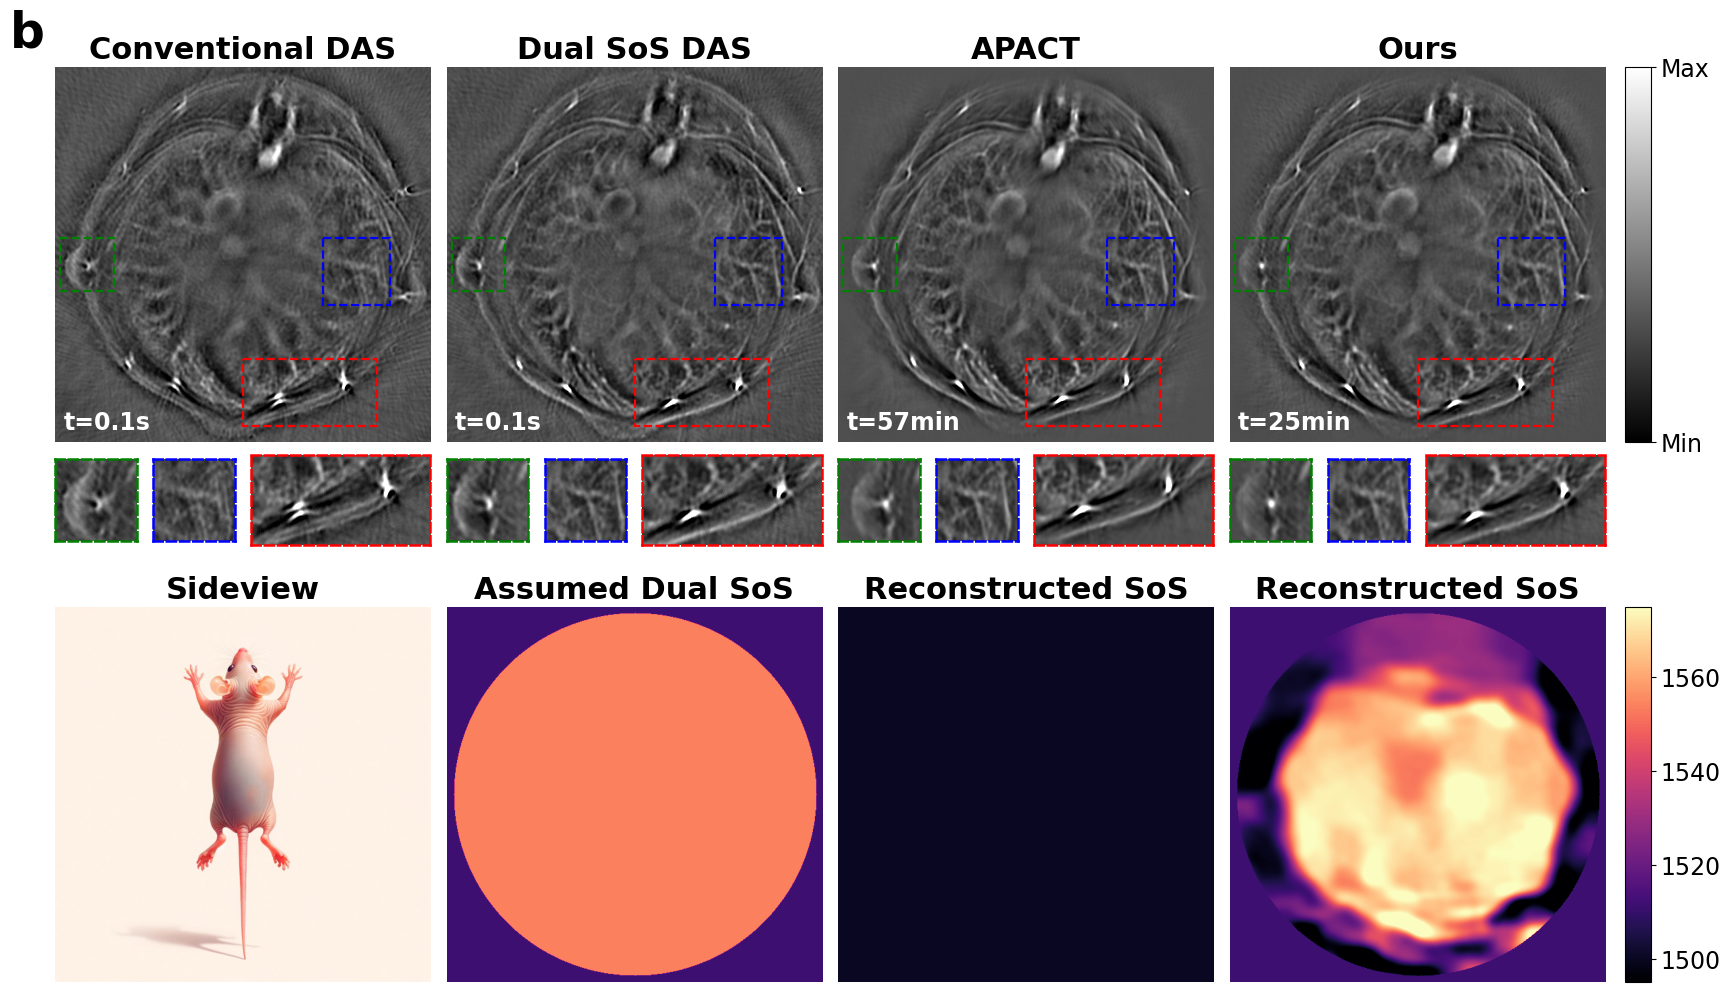

In [25]:
patches = [(254, 7, 80, 80, 'green'), (255, 400, 100, 100,'blue'), (435, 280, 100, 200, 'red')]
# (255, 400, 100, 100,'blue')

fig = plt.figure(figsize=(20, 12))
gs = GridSpec(19, 16)
norm = Normalize(vmax=8, vmin=-3.5)
norm_sos = Normalize(vmax=1575, vmin=1495)
for idx, (img, method, time, SoS, SoS_title) in enumerate(zip([rec_das_invivo, rec_dual_das_invivo, rec_apact_invivo, rec_jr_invivo],
                                                              ['Conventional DAS', 'Dual SoS DAS', 'APACT', 'Ours'],
                                                              ['t=0.1s', 't=0.1s', 't=57min', 't=25min'],
                                                              [None, SoS_dual_invivo, SoS_APACT_phamtom, SoS_jr_invivo],
                                                              ['Sideview', 'Assumed Dual SoS', 'Reconstructed SoS', 'Reconstructed SoS'])):
    ax = plt.subplot(gs[0:8,idx*4:(idx+1)*4])
    plt.title(method, fontsize=22, fontweight='semibold')
    plt.axis('off')
    if idx == 0:
        plt.title('b', loc='left', x=-0.12, y=1.03, fontsize=35, fontweight='semibold', color='black')
    plt.imshow(img, cmap='gray', norm=norm)
    plt.text(s=time, x=12, y=540, fontweight='semibold', fontsize=17, color='white')
    if idx == 3:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.013, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm)
        cb.set_ticks([8, -3.5])
        cb.set_ticklabels(['Max', 'Min'], fontsize=17)
    
    for k, (x, y, h, w, color) in enumerate(patches):
        rect = plt.Rectangle((y, x), w, h, fill=False, edgecolor=color, linewidth=1.6, linestyle='--')
        ax.add_patch(rect)
        ax2 = plt.subplot(gs[8:10,idx*4+k:idx*4+k+1+(k==2)])
        plt.imshow(img[x:x+h, y:y+w], cmap='gray', norm=norm)
        plt.xticks([])
        plt.yticks([])
        for loc in ['bottom', 'top', 'left', 'right']:
            ax2.spines[loc].set_color(color)
            ax2.spines[loc].set_linewidth(1.8)
            ax2.spines[loc].set_linestyle('--')

    ax = plt.subplot(gs[11:19,idx*4:(idx+1)*4])
    plt.title(SoS_title, fontsize=22, fontweight='semibold')
    plt.axis('off')
    if idx == 0:
        plt.imshow(img_mouse, cmap='gray')
        continue
    plt.imshow(SoS, cmap='magma', norm=norm_sos)
    if idx == 3:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.013, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_sos)
        cb.set_ticks([1500, 1520, 1540, 1560])
        cb.set_ticklabels(['1500', '1520', '1540', '1560'], fontsize=17)

plt.savefig('figure_invivo.png', bbox_inches='tight', dpi=256)